**Backpropagation Regression Problem**



> Nueral Networks






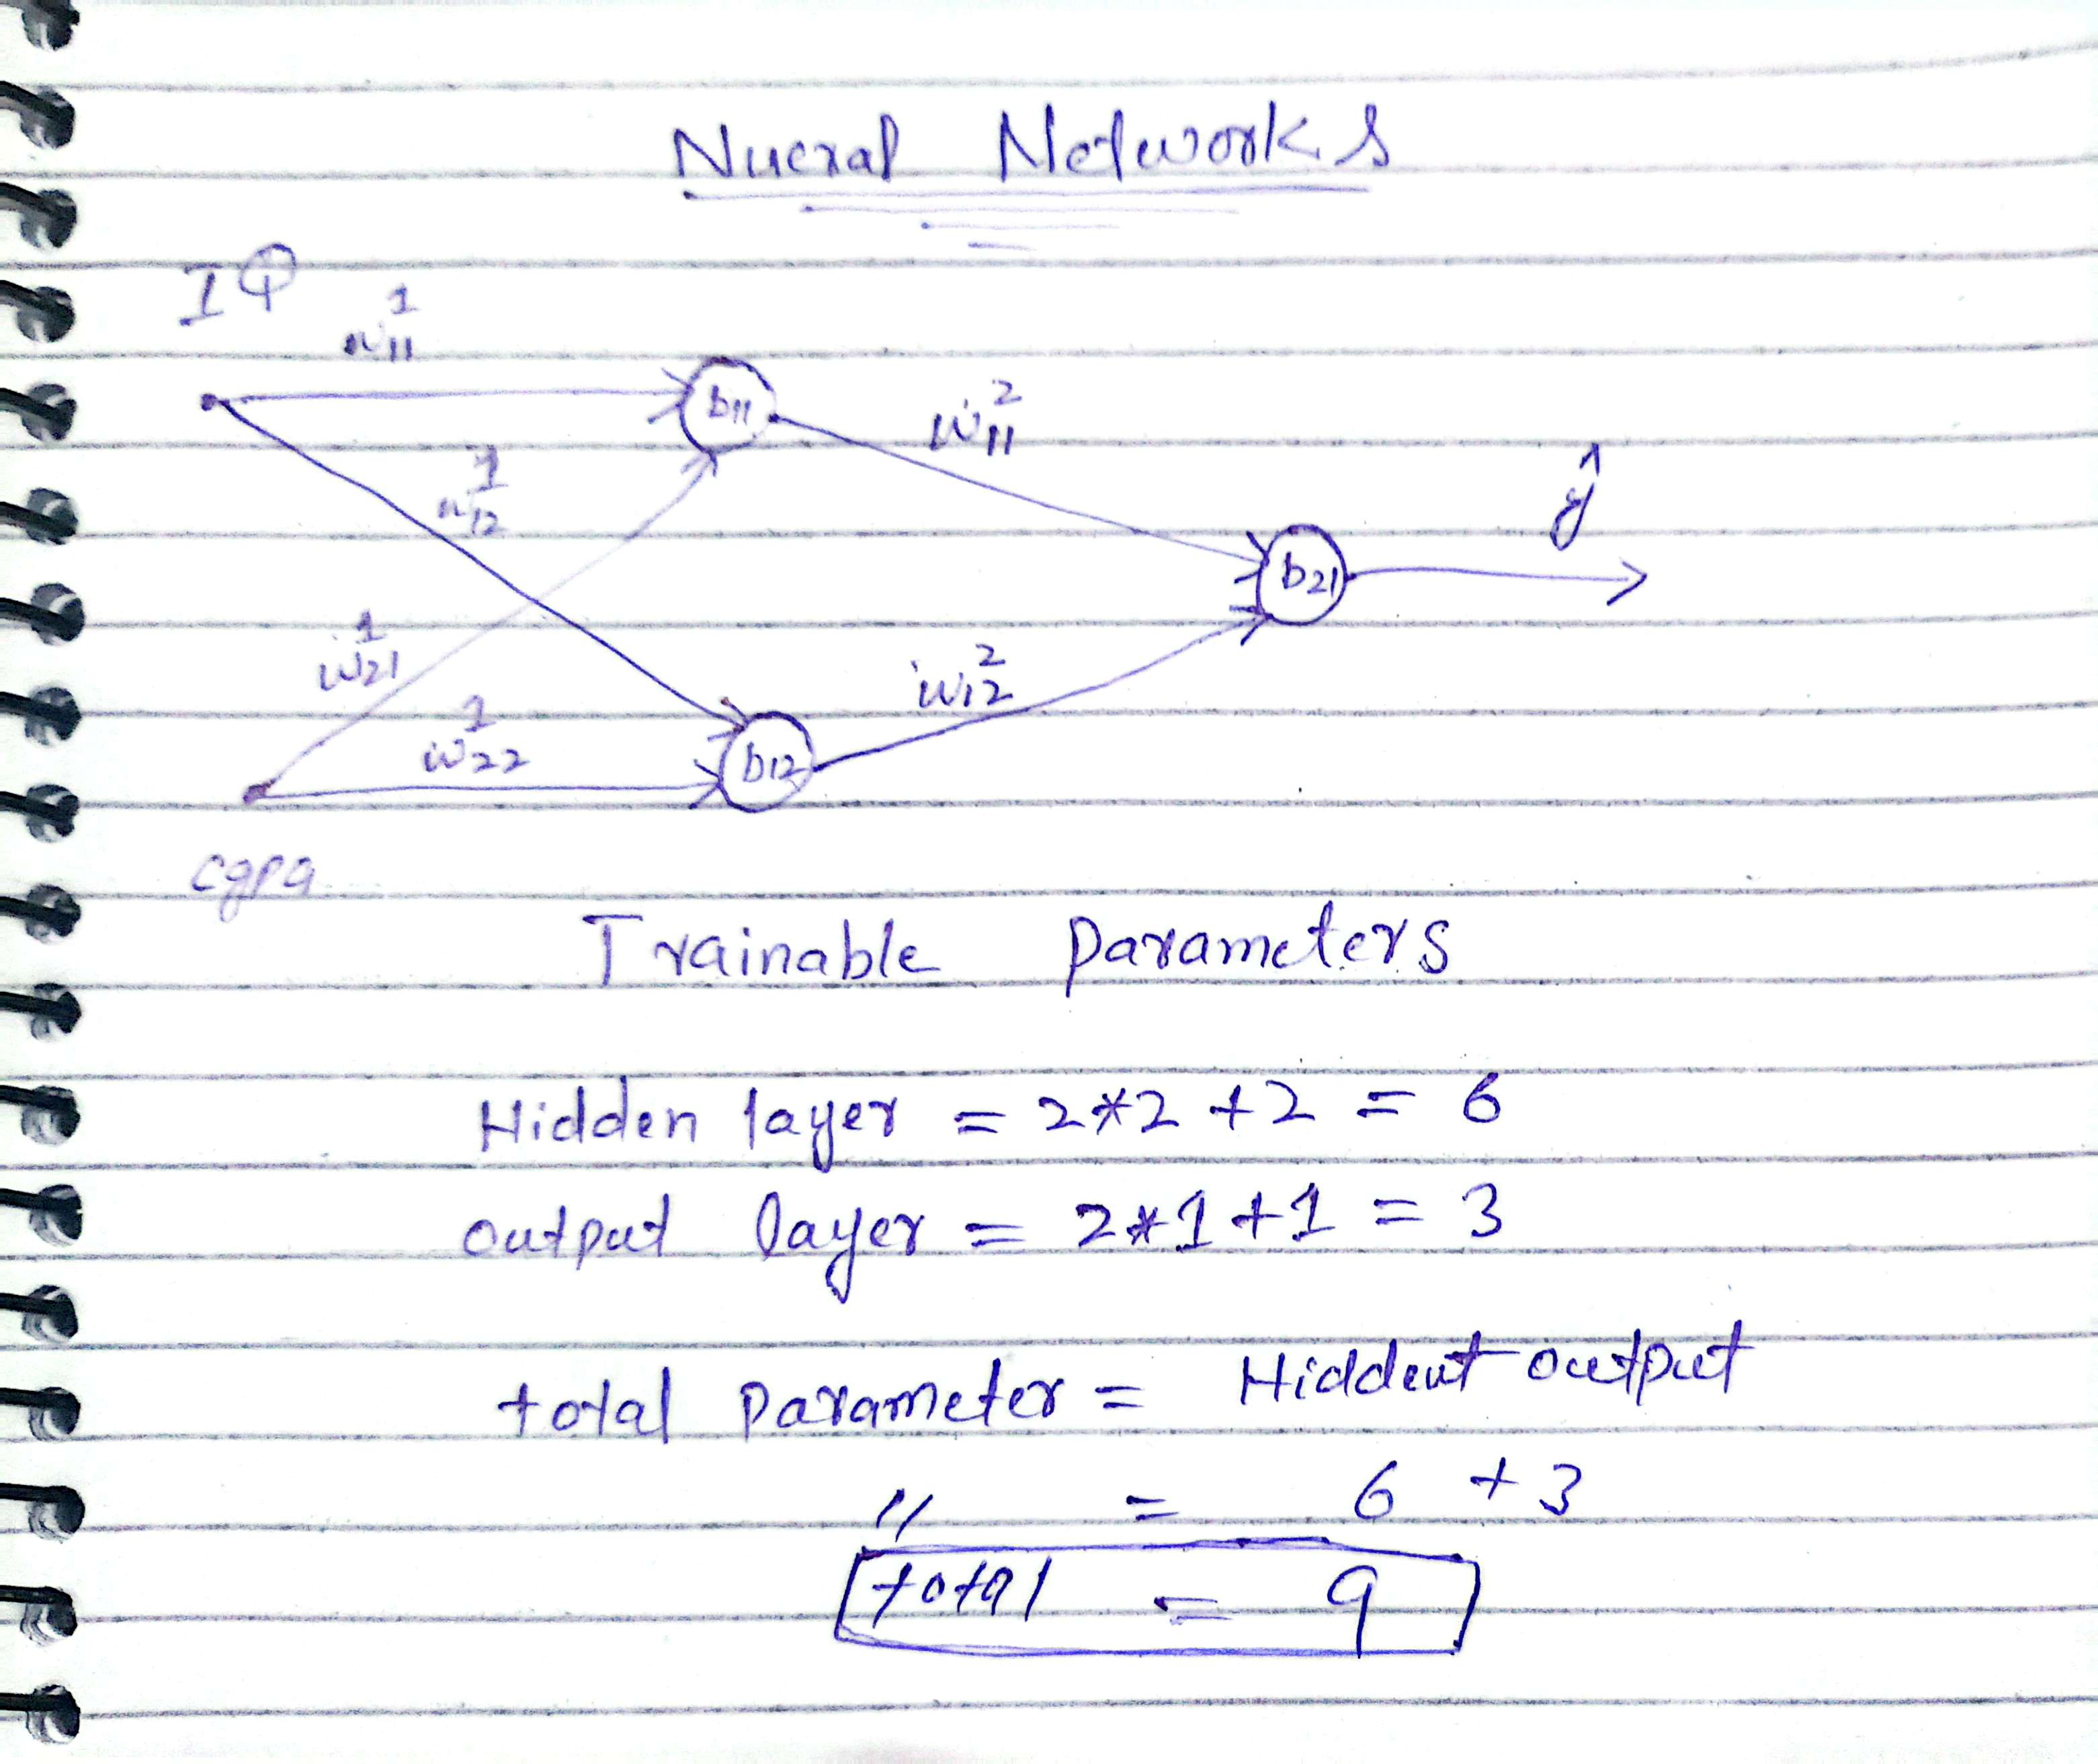

In [165]:
import numpy as np
import pandas as pd

In [166]:
df= pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]],columns=['cgpa', 'profile_score', 'lpa'])
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


**Nueral Netwok Parameter**

1.  3 layers (input layer, hidden layer, ouput layer)
2.  init 9 paramerters for the nueral network.
3.  init_parameters([2,2,1])  2 input from input layer , 2 in hidden layerinput for output layer.
4.  w1 array value first layer four weights (w11,w12,w21,w22)-> first layer
5.  b1 array first two bias (b11, b12) -> hidden layer
6.  w2 array value 2nd layer two weights vlaue (w11,w12)-> second layer
7.  b2 array value of single bias(b21)-> last layer

In [167]:

def init_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

In [168]:
init_parameters([2,2,1]) # 3 layers (input layert , hidden layer , output layer)

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [169]:
def linear_forward(A_prev, W, b): # input from previous layer ,weight and bias itself
  Z = np.dot(W.T, A_prev) + b
  return Z

**Faward Propagations**
1. A0,w1,b1 feed and generate A1(ouput)
2. A1,w2,b2, feed and generate A2(output which our pridicted value y_hat)

In [170]:
# farward propagartions
def farward_propagation(X, parameters):
  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]

    A = linear_forward(A_prev, Wl, bl)

  return A,A_prev

**A. BackPropagation With Debugging Way**

**1. First Record Update weights and Bias**


In [171]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # here it feed first input record to nueral network
y = df[['lpa']].values[0][0]
parameters=init_parameters([2,2,1]) # init nueral architecture
y_hat,A1 = farward_propagation(X, parameters)

In [172]:
input_loss=(y-y_hat)**2

In [173]:
y_hat = input_loss[0][0]

**Back Propagations**
1. Update weights and bias using gradient decent.
$$
w_{\text{new}} = w_{\text{old}} - \eta \cdot \nabla L(w_{\text{old}})
$$

2. You can see the updated weights and bias for first record uing gradient decent at cell No 22.


In [174]:
# this update the weights and bias for first record.
def update_paramerter(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])



In [175]:
update_paramerter(parameters,y,y_hat,A1,X)

In [176]:
parameters

{'W1': array([[0.0893943, 0.0893943],
        [0.0893943, 0.0893943]]),
 'b1': array([[-0.00132571],
        [-0.00132571]]),
 'W2': array([[0.06946432],
        [0.06946432]]),
 'b2': array([[0.05037952]])}

**2. Second Record Update weights and Bias**

In [177]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # here it feed first input record to nueral network
y = df[['lpa']].values[1][0]
y_hat,A1 = farward_propagation(X, parameters)

In [178]:
input_loss=(y-y_hat)**2

In [179]:
y_hat = input_loss[0][0]

In [180]:
update_paramerter(parameters,y,y_hat,A1,X)

In [181]:
parameters

{'W1': array([[0.08466047, 0.08330795],
        [0.08466047, 0.08330795]]),
 'b1': array([[-0.00200197],
        [-0.00200197]]),
 'W2': array([[0.01924159],
        [0.01924159]]),
 'b2': array([[-0.0159042]])}

**3. Third Record Update weights and Bias**

In [182]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # here it feed first input record to nueral network
y = df[['lpa']].values[2][0]
y_hat,A1 = farward_propagation(X, parameters)

In [183]:
input_loss=(y-y_hat)**2

In [184]:
y_hat = input_loss[0][0]

In [185]:
update_paramerter(parameters,y,y_hat,A1,X)

In [186]:
parameters

{'W1': array([[0.10622094, 0.11924206],
        [0.10576674, 0.11848506]]),
 'b1': array([[0.00159144],
        [0.00151574]]),
 'W2': array([[-0.06075593],
        [-0.05947602]]),
 'b2': array([[-0.11862104]])}

**4. Forth Record Update weights and Bias**

In [187]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # here it feed first input record to nueral network
y = df[['lpa']].values[3][0]
y_hat,A1 = farward_propagation(X, parameters)

In [188]:
# here we calculate the loss for second recored
input_loss=(y-y_hat)**2

In [189]:
y_hat = input_loss[0][0]

In [190]:
update_paramerter(parameters,y,y_hat,A1,X)

In [191]:
parameters

{'W1': array([[0.21436891, 0.37879719],
        [0.22292741, 0.39967067]]),
 'b1': array([[0.02322103],
        [0.02494787]]),
 'W2': array([[-0.2301206 ],
        [-0.24929811]]),
 'b2': array([[-0.34329054]])}

**A. BackPropagation With Epochs Approach**


In [192]:
parameters = init_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = farward_propagation(X,parameters)
    y_hat = y_hat[0][0]

    update_paramerter(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962


{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}